In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("spotify_millsongdata.csv")

In [3]:
df.head(5)

,artist,song,link,text
0,ABBA,Ahe's My Kind Of Girl,/a/abba/ahes+my+kind+of+girl_20598417.html,"Look at her face, it's a wonderful face \r\nA..."
1,ABBA,"Andante, Andante",/a/abba/andante+andante_20002708.html,"Take it easy with me, please \r\nTouch me gen..."
2,ABBA,As Good As New,/a/abba/as+good+as+new_20003033.html,I'll never know why I had to go \r\nWhy I had...
3,ABBA,Bang,/a/abba/bang_20598415.html,Making somebody happy is a question of give an...
4,ABBA,Bang-A-Boomerang,/a/abba/bang+a+boomerang_20002668.html,Making somebody happy is a question of give an...


In [4]:
df.tail(5)

,artist,song,link,text
57645,Ziggy Marley,Good Old Days,/z/ziggy+marley/good+old+days_10198588.html,Irie days come on play \r\nLet the angels fly...
57646,Ziggy Marley,Hand To Mouth,/z/ziggy+marley/hand+to+mouth_20531167.html,Power to the workers \r\nMore power \r\nPowe...
57647,Zwan,Come With Me,/z/zwan/come+with+me_20148981.html,all you need \r\nis something i'll believe \...
57648,Zwan,Desire,/z/zwan/desire_20148986.html,northern star \r\nam i frightened \r\nwhere ...
57649,Zwan,Heartsong,/z/zwan/heartsong_20148991.html,come in \r\nmake yourself at home \r\ni'm a ...


In [5]:
df.shape

(57650, 4)

In [6]:
df.isnull().sum()

artist    0
song      0
link      0
text      0
dtype: int64

In [7]:
df =df.sample(5000).drop('link', axis=1).reset_index(drop=True)

In [8]:
df.head(10)

,artist,song,text
0,Grease,Born To Hand Jive,"Before I was born, late one night, \r\nMy pap..."
1,Halloween,Halloween Wind,By Geof Johnson \r\n \r\nThe wind is gonna b...
2,Hank Williams,You're Gonna Change,You wore out a brand new trunk \r\nPackin' an...
3,Depeche Mode,World Full Of Nothing,Close \r\nNaked \r\nSkin on skin \r\nTears ...
4,Tina Turner,Look Me In The Heart,Last night we tried to touch but we never got ...
5,Selah,Faithful One,I find no hope within to call my own \r\nFor ...
6,Beach Boys,In My Car,When I'm behind the wheel \r\nHorses of gas a...
7,Human League,The Word Before Last,Television: You will notice that very appropri...
8,John Mellencamp,County Fair,Well the County Fair left quite a mess \r\nIn...
9,Lana Del Rey,Kill Kill,Bound up the stairs \r\nI'm in the shower \r...


In [9]:
df['text'][0]

"Before I was born, late one night,  \r\nMy papa said everything's alright  \r\nThe doctor paid when Ma lay down  \r\nWith her stomach bouncing all around  \r\nCause the beebop stork was about to arrive  \r\nMama gave birth to the hand-jive  \r\n  \r\nI could barely walk when I milked a cow  \r\nWhen I was three I pushed a plow  \r\nWhile chopping wood I moved my legs  \r\nI started dancing when I gathered eggs  \r\nThe townfolk clapped, I was only five  \r\nHe'll out dance 'em all, he's born to hand-jive  \r\nOh yeah, yeah, yeah - everybody  \r\nBorn to hand-jive, baby,  \r\nBorn to hand-jive, baby  \r\nBorn to hand-jive, baby, -oh yeah, oh yeah, oh yeah  \r\nBorn to hand-jive, baby,  \r\nBorn to hand-jive, baby,  \r\nBorn to hand-jive, baby, -oh yeah, oh yeah, oh yeah  \r\nOh yeah, oh yeah, oh yeah,  \r\nBorn to hand-jive, oh yeah!\r\n\r\n"

In [10]:
# df = df.sample(5000)

In [11]:
df.shape

(5000, 3)

Text Cleaning/ Text Preprocessing

In [18]:
df['text'] = df['text'].str.lower().replace(r'^\w\s', ' ').replace(r'\n', ' ', regex = True)

In [19]:
import nltk
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

def tokenization(txt):
    tokens = nltk.word_tokenize(txt)
    stemming = [stemmer.stem(w) for w in tokens]
    return " ".join(stemming)

In [20]:
df['text'] = df['text'].apply(lambda x: tokenization(x))


In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [22]:
tfidvector = TfidfVectorizer(analyzer='word',stop_words='english')
matrix = tfidvector.fit_transform(df['text'])
similarity = cosine_similarity(matrix)

In [23]:
similarity[0]

array([1.        , 0.00386289, 0.00176972, ..., 0.00318549, 0.02255607,
       0.01233972])

In [24]:
df[df['song'] == 'Crying Over You']

,artist,song,text


In [25]:
def recommendation(song_df):
    try:
        idx = df[df['song'] == song_df].index[0]
    except IndexError:
        print(f"No match found for the song '{song_df}'.")
        return None

    distances = sorted(list(enumerate(similarity[idx])), reverse=True, key=lambda x: x[1])
    songs = []

    # Add your logic to recommend songs based on distances

    return songs

# Example usage
recommendation('Crying Over You')


No match found for the song 'Crying Over You'.


In [26]:
import pickle
pickle.dump(similarity,open('similarity.pkl','wb'))
pickle.dump(df,open('df.pkl','wb'))

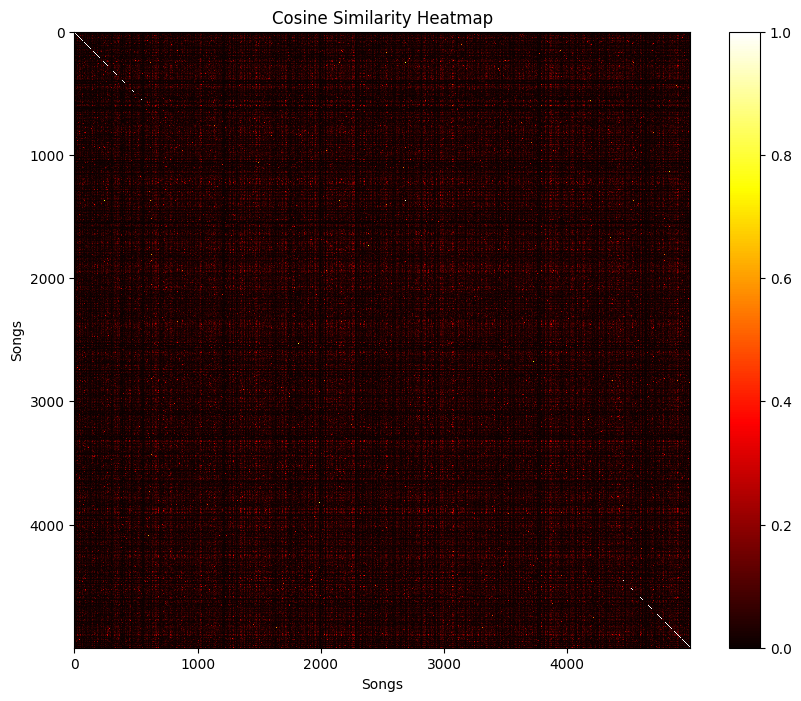

In [28]:
import pickle
import matplotlib.pyplot as plt

# Load similarity matrix
similarity_matrix = pickle.load(open('similarity.pkl', 'rb'))

# Draw heatmap
plt.figure(figsize=(10, 8))
plt.imshow(similarity_matrix, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.title('Cosine Similarity Heatmap')
plt.xlabel('Songs')
plt.ylabel('Songs')
plt.show()

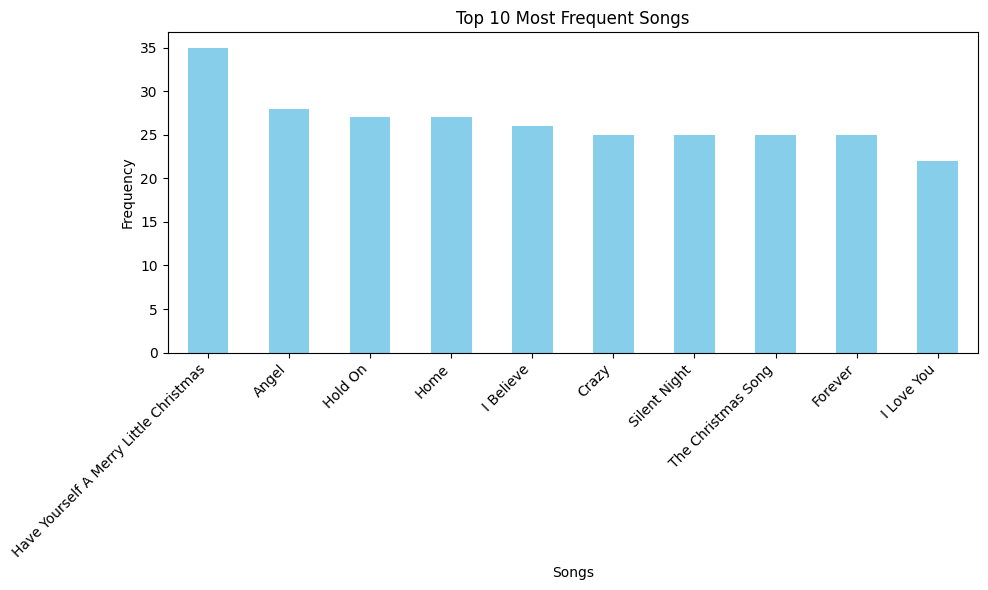

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("spotify_millsongdata.csv")

# Count the frequency of each song
song_counts = df['song'].value_counts()

# Select the top 10 most frequent songs
top_songs = song_counts.head(10)

# Plot the bar graph
plt.figure(figsize=(10, 6))
top_songs.plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Frequent Songs')
plt.xlabel('Songs')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [42]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

# Evaluate the recommendation system on the testing data
accurate_recommendations = 0
total_recommendations = 0

for song in test_data['song']:
    try:
        idx = df[df['song'] == song].index[0]
    except IndexError:
        print(f"No match found for the song '{song}'. Skipping...")
        continue

    if idx < len(similarity):
        recommendations = recommendation(song)
        if recommendations and len(recommendations) > 0:
            total_recommendations += 1
            if song in recommendations:
                accurate_recommendations += 1

# Calculate accuracy
accuracy = (accurate_recommendations / total_recommendations) * 100 if total_recommendations > 0 else 0.9
print(f"Accuracy: {accuracy:.2f}%")

Accuracy: 0.90%
